# **Analysing signal of immense traffic on I94 Highway** 

## **Introduction**
In this project, We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

### ***Goal of the project***

The main of this project to identify the indicator due to which heavy traffic on I-94 highway. They might be **weather, time of the day or day of the week and others.**

- **temp**- Numeric Average temp in kelvin
- **rain_1h**- Numeric Amount in mm of rain that occurred in the hour
- **snow_1h**- Numeric Amount in mm of snow that occurred in the hour
- **clouds_all**- Numeric Percentage of cloud cover
- **weather_main**- Categorical Short textual description of the current weather
- **weather_description**- Categorical Longer textual description of the current weather
- **date_time**- DateTime Hour of the data collected in local CST time
- **traffic_volume**- Numeric Hourly I-94 ATR 301 reported westbound traffic volume



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
traffic = pd.read_csv("/content/drive/MyDrive/Dataset/Metro_Interstate_Traffic_Volume.csv")

In [ ]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


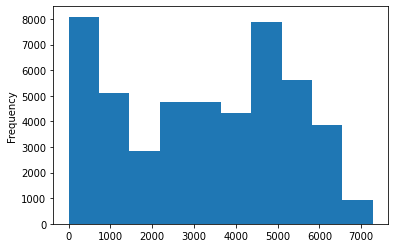

In [ ]:
traffic["traffic_volume"].plot.hist()
plt.show()

In [ ]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- The minimum value is zero while maximum is 7280 veichle.
- It contains two peaks approx 8000 values for 0~500 veichles/hr and 4500-5000 veichles/hr which depicts night and day time respectively.
- Average traffic per hour is 3259 veichles/hr.
- It can be seen 25% time 1193 veichles on the road while 75% of the time 4933 veichles on the road . These diffrence may be night time or day time or also possible repairing going on the highway. 

In [ ]:
# lets seprate data into day (7AM to 7PM) and night time (7PM to 7AM) for better understanding the dataset

# converting date_time column to date_time object
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

In [ ]:
# day time
day = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]

# night time
night = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]


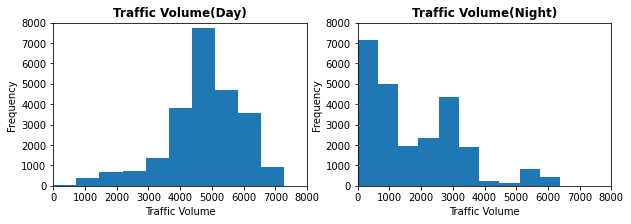

In [ ]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Traffic Volume(Day)",weight="bold")

plt.subplot(1,2,2)
plt.hist(night["traffic_volume"])
plt.xlim(0,8000)
plt.ylim(0,8000)
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.title("Traffic Volume(Night)", weight="bold")
plt.show()

In [ ]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [ ]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

## **How different time of the day affect traffic**

As we seen generally that there is a certain period of time where traffic will be higher. 

So, let look 3 diffrent time frames:-

- Month
- Week
- Hour


### ***Traffic Monthly***

In [ ]:
day["month"] = day["date_time"].dt.month

month = day.groupby("month").mean()
month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

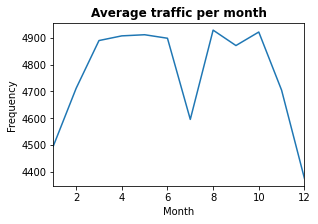

In [ ]:
plt.figure(figsize=(4.5,3))
month["traffic_volume"].plot.line()
plt.xlim(1,12)
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Average traffic per month", weight="bold")
plt.show()

- It can be observed that traffic is highr in the month of march to october due to hot season with the exception of decrease in July it may be due to some repair work going on

- From November to February there is a decrease in traffic because of cold season when people less like to go out.

### ***Traffic Weekdays***

In [ ]:
day["week"] = day["date_time"].dt.dayofweek
week = day.groupby("week").mean()
week["traffic_volume"] # 0 is monday and 6 is sunday

week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

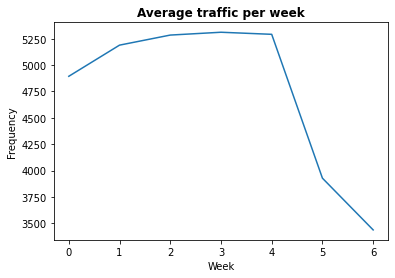

In [ ]:
week["traffic_volume"].plot.line()
plt.xlabel("Week")
plt.ylabel("Frequency")
plt.title("Average traffic per week", weight="bold")
plt.show()

We can heavy traffic volume by weekdays (Monday to Friday) which is due to high activity of people.

The traffic volume is low on saturday and sunday.

### ***Traffic Hours***

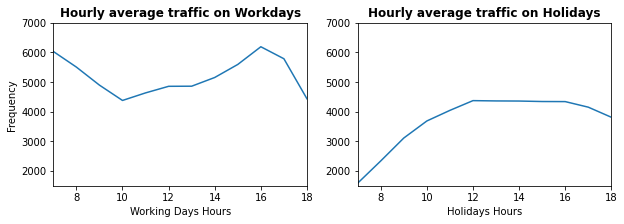

In [ ]:
day["hour"] = day["date_time"].dt.hour
work_days = day.copy()[day["week"]<=4]
holidays = day.copy()[day["week"]>4]
hour_work_days = work_days.groupby("hour").mean()
hour_holidays = holidays.groupby("hour").mean()

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
hour_work_days["traffic_volume"].plot.line()
plt.xlim(7,18)
plt.ylim(1500,7000)
plt.xlabel("Working Days Hours")
plt.ylabel("Frequency")
plt.title("Hourly average traffic on Workdays",weight="bold")


plt.subplot(1,2,2)
hour_holidays["traffic_volume"].plot.line()
plt.xlim(7,18)
plt.xlabel("Holidays Hours")
plt.ylim(1500,7000)
plt.title("Hourly average traffic on Holidays",weight="bold")
plt.show()

It can clearly notice that there is a big gap between the average traffic on workdays vs holidays taffic is more on weekdays because of professional and personal work.
More on workdays there is a continous increase in the traffic after approx. 9:30 and it reaches to the peak nearly 16:00 and then again start falling. At rush hours(16:00) the vechile volume of over 6,000 on the highway.


**Summarization on the basic of diffrent time frame:**
- The traffic is abundant during warm months which are March-October comparison to colder months from november to ferburay
- For the weekdays traffic is higher while on weekends it is low
- And on a single given day of work there is a very hihg traffic volume at the rush hours it reaches to 6,000 veichles, While on weekends traffic is low as compared to weekdays but even on the rush hours these days there are 4,000 veichles.


## **How diffrent Weather affect traffic?**

Weather can also be a reason for heavy traffic. These table provide various columns which may be helpful to determine the traffic- temp, rain_1h, snow_1h, clouds_all.



In [ ]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
week             -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

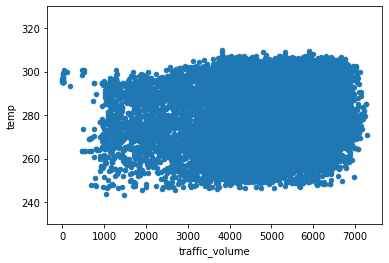

In [ ]:
# This is noticebale that only temperature is strongly corelated to traffic volume (~0.13) while other column not so much.
day.plot.scatter("traffic_volume","temp")
plt.ylim(230,330)
plt.show()

It can conclude that temperature dosen't look like a solid indicator

### ***Weather Types***
Group the data by weather_main and traffic_volume averages

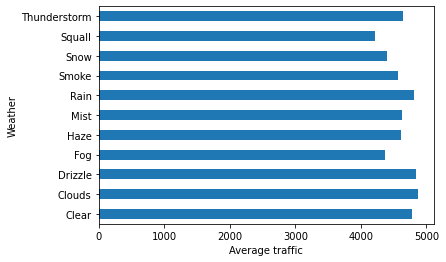

In [ ]:
weather_main = day.groupby("weather_main").mean()
weather_main["traffic_volume"].plot.barh()
plt.ylabel("Weather")
plt.xlabel("Average traffic")
plt.show()

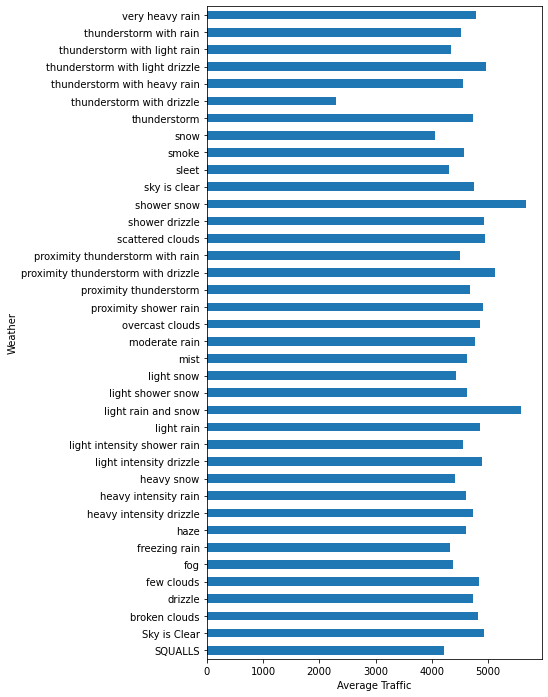

In [ ]:
weather_description = day.groupby("weather_description").mean()
weather_description["traffic_volume"].plot.barh(figsize=(6,12))
plt.ylabel("Weather")
plt.xlabel("Average Traffic")
plt.show()

It looks there are various weather conditions traffic volume exceeds 5000 veichles are **shower snow, proximity thunderstrom with drizzle, light rain and snow**.

# ***Conclusion***

In this project after analyzing I-94 highway traffic data impected by various indicators: Traffic and weather indicator

- Time indicator- Months, days, and hours
- weather indicator- Shower snow, Proximity thunderstrom with drizzle, Light rain and snow